In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fbprophet import Prophet
%matplotlib inline
import warnings
import datetime

In [2]:
# Create dataframe from datafile
d_index = 'time'
inpath = './inputs/kolkata-pm2.5-calibrated.csv'
final_data = pd.read_csv(inpath,parse_dates=True)
final_data.head()


,time,"Ballygunge Phari, Kolkata - Cleair","Ballygunge, Kolkata - WBPCB","Behala Buro Shibtala, Kolkata - Cleair","Beleghata Building More, Kolkata - Cleair","Belur Math, Howrah - WBPCB","Bidhannagar, Kolkata - WBPCB","Ekbalpur, Kolkata - Cleair","Fort William, Kolkata - WBPCB","Garia, Kolkata - Cleair",...,"Padmapukur, Howrah - WBPCB","Rabindra Bharati University, Kolkata - Cleair","Rabindra Bharati University, Kolkata - WBPCB","Rabindra Sarobar, Kolkata - WBPCB","Ruby More / Simla Restaurant, Kolkata - Cleair","Shyam Bazar, Kolkata - Cleair","Taratala More, Kolkata - Cleair","Topsia More, Kolkata - Cleair",US Diplomatic Post: Kolkata,"Victoria, Kolkata - WBPCB"
0,2019-09-01 00:00:00,NaN,14.38,NaN,NaN,32.66,2.62,NaN,28.88,NaN,...,13.04,NaN,33.38,13.12,NaN,NaN,NaN,NaN,NaN,22.27
1,2019-09-01 01:00:00,NaN,14.03,NaN,NaN,33.02,3.43,NaN,32.58,NaN,...,23.11,NaN,32.12,12.93,NaN,NaN,NaN,NaN,NaN,22.48
2,2019-09-01 02:00:00,NaN,13.87,NaN,NaN,30.97,3.17,NaN,29.87,NaN,...,17.91,NaN,24.12,12.77,NaN,NaN,NaN,NaN,NaN,19.95
3,2019-09-01 03:00:00,NaN,15.49,NaN,NaN,30.87,2.82,NaN,25.88,NaN,...,14.07,NaN,28.90,11.15,NaN,NaN,NaN,NaN,NaN,20.03
4,2019-09-01 04:00:00,NaN,16.23,NaN,NaN,35.12,2.62,NaN,21.44,NaN,...,10.77,NaN,25.62,9.82,NaN,NaN,NaN,NaN,NaN,24.05


In [3]:
final_data[d_index] = pd.to_datetime(final_data[d_index])

In [4]:
final_data.dtypes

time                                              datetime64[ns]
Ballygunge Phari, Kolkata - Cleair                       float64
Ballygunge, Kolkata - WBPCB                              float64
Behala Buro Shibtala, Kolkata - Cleair                   float64
Beleghata Building More, Kolkata - Cleair                float64
Belur Math, Howrah - WBPCB                               float64
Bidhannagar, Kolkata - WBPCB                             float64
Ekbalpur, Kolkata - Cleair                               float64
Fort William, Kolkata - WBPCB                            float64
Garia, Kolkata - Cleair                                  float64
Ghusuri, Howrah - WBPCB                                  float64
Jadavpur, Kolkata - WBPCB                                float64
Padmapukur, Howrah - WBPCB                               float64
Rabindra Bharati University, Kolkata - Cleair            float64
Rabindra Bharati University, Kolkata - WBPCB             float64
Rabindra Sarobar, Kolkata

###  Predicting for Ghusuri, Howrah - WBPCB

In [5]:
# Create dataframe required by FBProphet for chosen location

location = 'Ghusuri, Howrah - WBPCB'

in_data = final_data[[d_index,location]]
in_data.columns = ['ds', 'y']
in_data.head()

,ds,y
0,2019-09-01 00:00:00,36.32
1,2019-09-01 01:00:00,34.07
2,2019-09-01 02:00:00,31.60
3,2019-09-01 03:00:00,33.70
4,2019-09-01 04:00:00,38.02


In [6]:
in_data.isnull().sum()

ds      0
y     598
dtype: int64

In [7]:
# Clean Data by dropping Nans
in_data.dropna(inplace=True)
in_data.isnull().sum()

/Users/apoorvaranade/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ds    0
y     0
dtype: int64

In [8]:
in_data.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [9]:
# Create and train Model

model = Prophet(
      yearly_seasonality=False,
      weekly_seasonality=3,
      daily_seasonality=8,
      changepoint_prior_scale=1/16,
      changepoint_range=0.95,
      seasonality_prior_scale=30.0,
      holidays_prior_scale=50.0
    )

model.add_country_holidays(country_name='IN')

model.fit(in_data)
future = model.make_future_dataframe(periods=2160, freq='H')

/Users/apoorvaranade/Library/Python/3.7/lib/python/site-packages/fbprophet/hdays.py:259: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)


In [10]:
in_data.tail()

,ds,y
9442,2020-09-28 10:00:00,67.78
9443,2020-09-28 11:00:00,65.20
9445,2020-09-28 13:00:00,79.60
9446,2020-09-28 14:00:00,78.98
9447,2020-09-28 15:00:00,71.40


In [11]:
future.tail()

,ds
11307,2020-12-27 11:00:00
11308,2020-12-27 12:00:00
11309,2020-12-27 13:00:00
11310,2020-12-27 14:00:00
11311,2020-12-27 15:00:00


In [12]:
pred = model.predict(future)
pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/Users/apoorvaranade/Library/Python/3.7/lib/python/site-packages/fbprophet/hdays.py:259: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)
/Users/apoorvaranade/Library/Python/3.7/lib/python/site-packages/fbprophet/hdays.py:259: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)


,ds,yhat,yhat_lower,yhat_upper
11307,2020-12-27 11:00:00,18.710976,-108.211976,135.538927
11308,2020-12-27 12:00:00,16.778038,-106.292585,126.645041
11309,2020-12-27 13:00:00,13.694999,-107.079394,126.244375
11310,2020-12-27 14:00:00,12.376207,-116.703921,120.553952
11311,2020-12-27 15:00:00,11.599108,-115.210180,124.155295


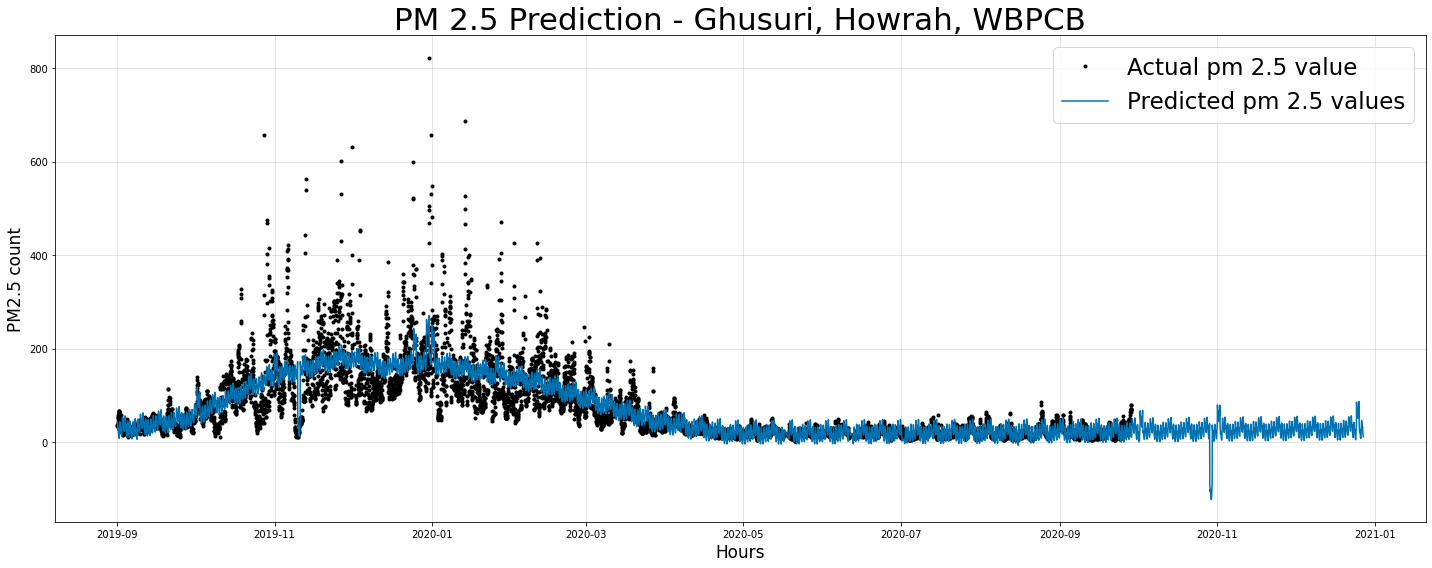

In [13]:
# Plot predictions from model
fcst = pred
xlabel = 'Hours'
ylabel = 'PM2.5 count'
fig = plt.figure(facecolor='w', figsize=(20,8))
ax = fig.add_subplot(111)
fcst_t = fcst['ds'].dt.to_pydatetime()
l1, = ax.plot(model.history['ds'].dt.to_pydatetime(), model.history['y'], 'k.')
l2, = ax.plot(fcst_t, fcst['yhat'], ls='-', c='#0072B2')
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_xlabel(xlabel,fontsize=17)
ax.set_ylabel(ylabel,fontsize=17)
ax.set_title('PM 2.5 Prediction - Ghusuri, Howrah, WBPCB',fontsize=31)
ax.legend([l1, l2], ['Actual pm 2.5 value', 'Predicted pm 2.5 values'], fontsize=23)
fig.tight_layout()
plt.show()

##### Graph for average weekly and daily pattern, trend over time, trend Indian over holidays

/Users/apoorvaranade/Library/Python/3.7/lib/python/site-packages/fbprophet/hdays.py:259: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)
/Users/apoorvaranade/Library/Python/3.7/lib/python/site-packages/fbprophet/hdays.py:259: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)


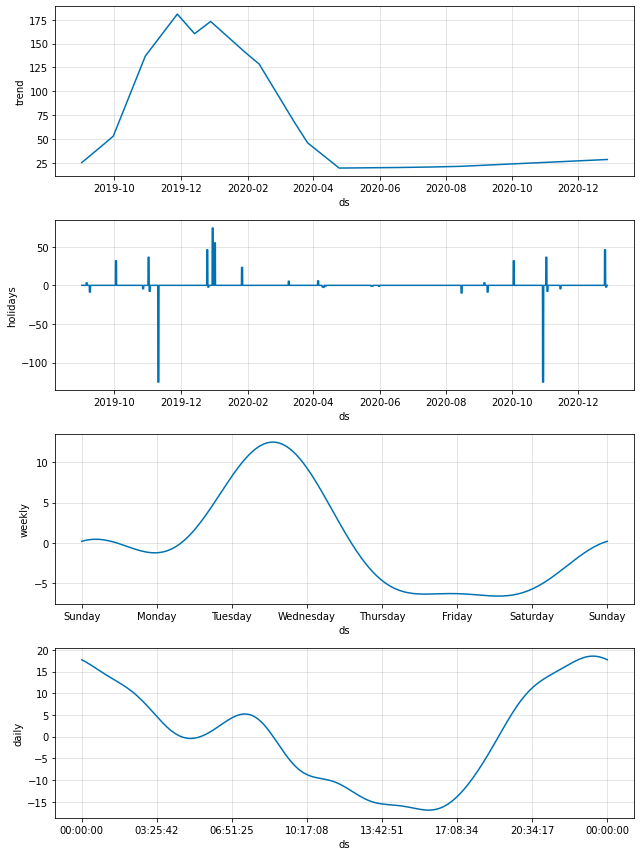

In [14]:
model.plot_components(pred, uncertainty=False).savefig('output.png')

### Prediction for Rabindra Sarobar, Kolkata - WBPCB
Above process repeated for another location

In [15]:
location = 'Rabindra Sarobar, Kolkata - WBPCB'

in_data = final_data[[d_index,location]]
in_data.columns = ['ds', 'y']
in_data.head()

,ds,y
0,2019-09-01 00:00:00,13.12
1,2019-09-01 01:00:00,12.93
2,2019-09-01 02:00:00,12.77
3,2019-09-01 03:00:00,11.15
4,2019-09-01 04:00:00,9.82


In [16]:
in_data.isnull().sum()


ds       0
y     1428
dtype: int64

In [17]:
in_data.dropna(inplace=True)
in_data.isnull().sum()

/Users/apoorvaranade/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


ds    0
y     0
dtype: int64

In [18]:
in_data.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [19]:
# Create and train Model

model = Prophet(
      yearly_seasonality=False,
      weekly_seasonality=3,
      daily_seasonality=8,
      changepoint_prior_scale=1/16,
      changepoint_range=0.95,
      seasonality_prior_scale=30.0,
      holidays_prior_scale=50.0
    )

model.add_country_holidays(country_name='IN')

model.fit(in_data)
future = model.make_future_dataframe(periods=2160, freq='H')

/Users/apoorvaranade/Library/Python/3.7/lib/python/site-packages/fbprophet/hdays.py:259: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)


In [20]:
in_data.tail()

,ds,y
9476,2020-09-29 20:00:00,15.38
9477,2020-09-29 21:00:00,11.38
9478,2020-09-29 22:00:00,9.18
9479,2020-09-29 23:00:00,7.40
9480,2020-09-30 00:00:00,5.70


In [21]:
future.tail()

,ds
10477,2020-12-28 20:00:00
10478,2020-12-28 21:00:00
10479,2020-12-28 22:00:00
10480,2020-12-28 23:00:00
10481,2020-12-29 00:00:00


In [22]:
pred = model.predict(future)
pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/Users/apoorvaranade/Library/Python/3.7/lib/python/site-packages/fbprophet/hdays.py:259: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)
/Users/apoorvaranade/Library/Python/3.7/lib/python/site-packages/fbprophet/hdays.py:259: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)


,ds,yhat,yhat_lower,yhat_upper
10477,2020-12-28 20:00:00,26.905412,-75.853105,130.062299
10478,2020-12-28 21:00:00,32.258482,-70.799080,140.970795
10479,2020-12-28 22:00:00,35.281667,-70.222462,147.614434
10480,2020-12-28 23:00:00,35.816518,-66.249014,143.110265
10481,2020-12-29 00:00:00,36.718078,-66.063543,141.073005


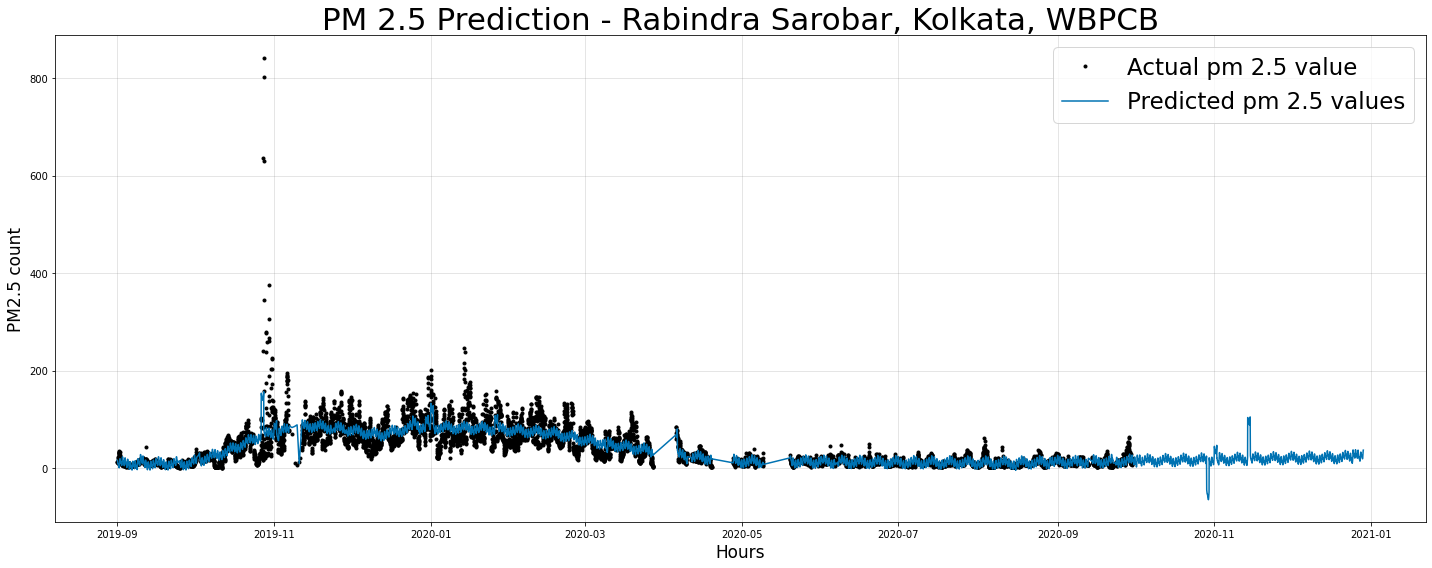

In [23]:
fcst = pred
xlabel = 'Hours'
ylabel = 'PM2.5 count'
fig = plt.figure(facecolor='w', figsize=(20,8))
ax = fig.add_subplot(111)
fcst_t = fcst['ds'].dt.to_pydatetime()
l1, = ax.plot(model.history['ds'].dt.to_pydatetime(), model.history['y'], 'k.')
l2, = ax.plot(fcst_t, fcst['yhat'], ls='-', c='#0072B2')
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_xlabel(xlabel,fontsize=17)
ax.set_ylabel(ylabel,fontsize=17)
ax.set_title('PM 2.5 Prediction - Rabindra Sarobar, Kolkata, WBPCB',fontsize=31)
ax.legend([l1, l2], ['Actual pm 2.5 value', 'Predicted pm 2.5 values'], fontsize=23)
fig.tight_layout()
plt.show()

#### Graph for average weekly and daily pattern, trend over time, trend Indian over holidays

/Users/apoorvaranade/Library/Python/3.7/lib/python/site-packages/fbprophet/hdays.py:259: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)
/Users/apoorvaranade/Library/Python/3.7/lib/python/site-packages/fbprophet/hdays.py:259: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)


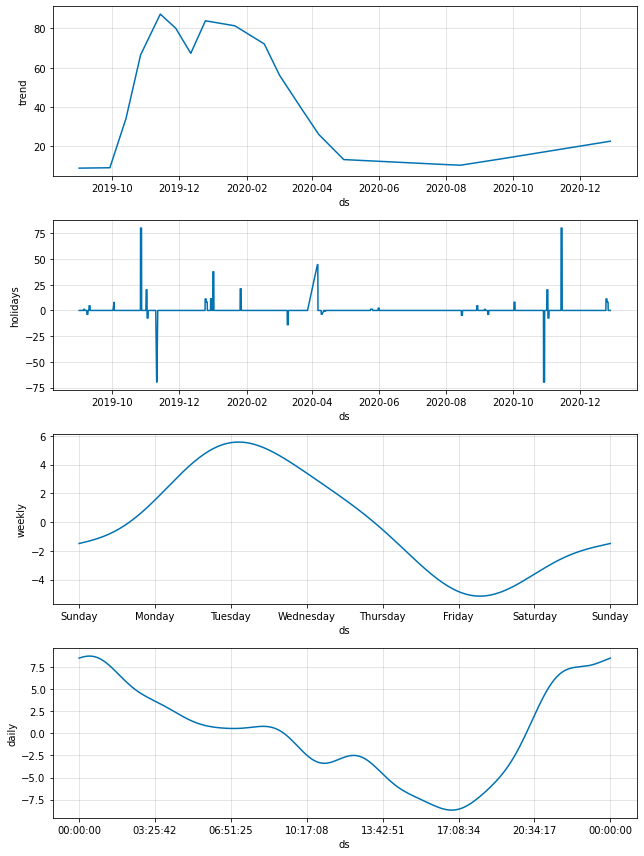

In [24]:
model.plot_components(pred, uncertainty=False).savefig('output.png')